In [5]:
# import system libs
import os
import itertools
from PIL import Image # pillow

# import data handling tools
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# import Deep learning Libraries
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.optimizers import Adam, Adamax
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import MaxPooling2D, Flatten, Dense,BatchNormalization,GlobalMaxPooling2D,Conv2D,Dropout,Flatten
from keras import regularizers
from imblearn.over_sampling import SMOTE

In [6]:
train_path = r"/Users/guruputtu/Downloads/Alzheimer_s Dataset/train/"
test_path = r"/Users/guruputtu/Downloads/Alzheimer_s Dataset/test/"
batch_s = 32
img_size= (224,224)
mode = "rgb"

In [7]:
import os
import pandas as pd

def df_maker(path):
    file_paths = []
    labels = []

    folds = os.listdir(path)
    for fold in folds:
        fold_path = os.path.join(path, fold)
        
        # Skip non-directory files
        if not os.path.isdir(fold_path):
            continue
        
        file_list = os.listdir(fold_path)
        for file in file_list:
            file_path = os.path.join(fold_path, file)
            file_paths.append(file_path)
            labels.append(fold)

    file_series = pd.Series(file_paths, name="file_paths")
    label_series = pd.Series(labels, name="labels")

    df = pd.concat([file_series, label_series], axis=1)
    return df

In [8]:
train_df = df_maker(train_path)

In [13]:
test_df = df_maker(test_path)

In [15]:
all_data = pd.concat([train_df,test_df])

In [17]:
train_df

,file_paths,labels
0,/Users/guruputtu/Downloads/Alzheimer_s Dataset...,VeryMildDemented
1,/Users/guruputtu/Downloads/Alzheimer_s Dataset...,VeryMildDemented
2,/Users/guruputtu/Downloads/Alzheimer_s Dataset...,VeryMildDemented
3,/Users/guruputtu/Downloads/Alzheimer_s Dataset...,VeryMildDemented
4,/Users/guruputtu/Downloads/Alzheimer_s Dataset...,VeryMildDemented
...,...,...
5116,/Users/guruputtu/Downloads/Alzheimer_s Dataset...,NonDemented
5117,/Users/guruputtu/Downloads/Alzheimer_s Dataset...,NonDemented
5118,/Users/guruputtu/Downloads/Alzheimer_s Dataset...,NonDemented
5119,/Users/guruputtu/Downloads/Alzheimer_s Dataset...,NonDemented


In [19]:
test_df

,file_paths,labels
0,/Users/guruputtu/Downloads/Alzheimer_s Dataset...,VeryMildDemented
1,/Users/guruputtu/Downloads/Alzheimer_s Dataset...,VeryMildDemented
2,/Users/guruputtu/Downloads/Alzheimer_s Dataset...,VeryMildDemented
3,/Users/guruputtu/Downloads/Alzheimer_s Dataset...,VeryMildDemented
4,/Users/guruputtu/Downloads/Alzheimer_s Dataset...,VeryMildDemented
...,...,...
1274,/Users/guruputtu/Downloads/Alzheimer_s Dataset...,NonDemented
1275,/Users/guruputtu/Downloads/Alzheimer_s Dataset...,NonDemented
1276,/Users/guruputtu/Downloads/Alzheimer_s Dataset...,NonDemented
1277,/Users/guruputtu/Downloads/Alzheimer_s Dataset...,NonDemented


In [21]:
all_data

,file_paths,labels
0,/Users/guruputtu/Downloads/Alzheimer_s Dataset...,VeryMildDemented
1,/Users/guruputtu/Downloads/Alzheimer_s Dataset...,VeryMildDemented
2,/Users/guruputtu/Downloads/Alzheimer_s Dataset...,VeryMildDemented
3,/Users/guruputtu/Downloads/Alzheimer_s Dataset...,VeryMildDemented
4,/Users/guruputtu/Downloads/Alzheimer_s Dataset...,VeryMildDemented
...,...,...
1274,/Users/guruputtu/Downloads/Alzheimer_s Dataset...,NonDemented
1275,/Users/guruputtu/Downloads/Alzheimer_s Dataset...,NonDemented
1276,/Users/guruputtu/Downloads/Alzheimer_s Dataset...,NonDemented
1277,/Users/guruputtu/Downloads/Alzheimer_s Dataset...,NonDemented


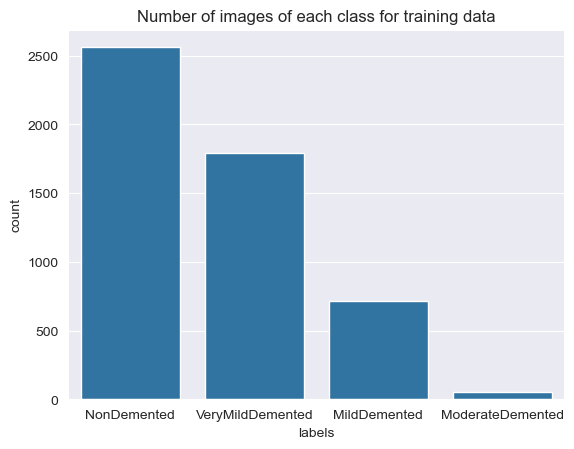

In [23]:
train_count_df = train_df.labels.value_counts().reset_index()
sns.barplot(data=train_count_df,x="labels",y="count")
plt.title("Number of images of each class for training data")
plt.show()

In [25]:
train_count_df

,labels,count
0,NonDemented,2560
1,VeryMildDemented,1792
2,MildDemented,717
3,ModerateDemented,52


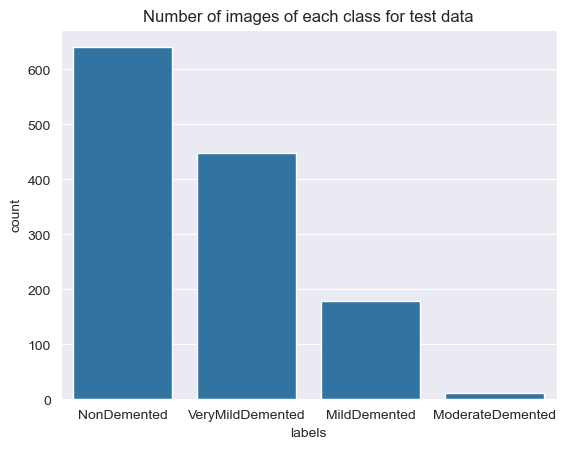

In [27]:
test_count_df = test_df.labels.value_counts().reset_index()
sns.barplot(data=test_count_df,x="labels",y="count")
plt.title("Number of images of each class for test data")
plt.show()

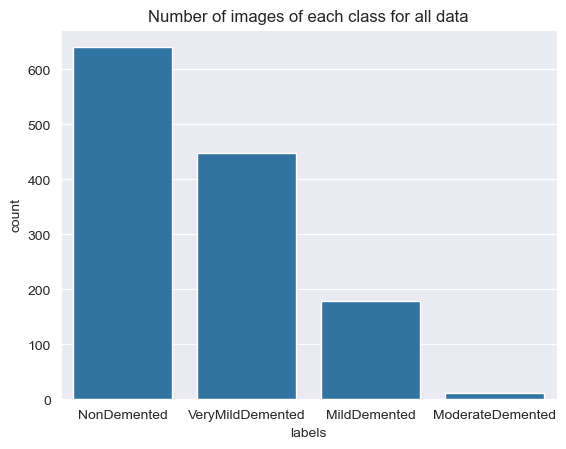

In [29]:
data_count_df = all_data.labels.value_counts().reset_index()
sns.barplot(data=test_count_df,x="labels",y="count")
plt.title("Number of images of each class for all data")
plt.show()

In [31]:
data_count_df

,labels,count
0,NonDemented,3200
1,VeryMildDemented,2240
2,MildDemented,896
3,ModerateDemented,64


In [33]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [35]:
data_generator = datagen.flow_from_dataframe(
    all_data,
    x_col = "file_paths",
    y_col = "labels",
    target_size=img_size,
    batch_size=batch_s,
    color_mode='rgb',
    class_mode='categorical',
    shuffle=False
)

Found 6400 validated image filenames belonging to 4 classes.


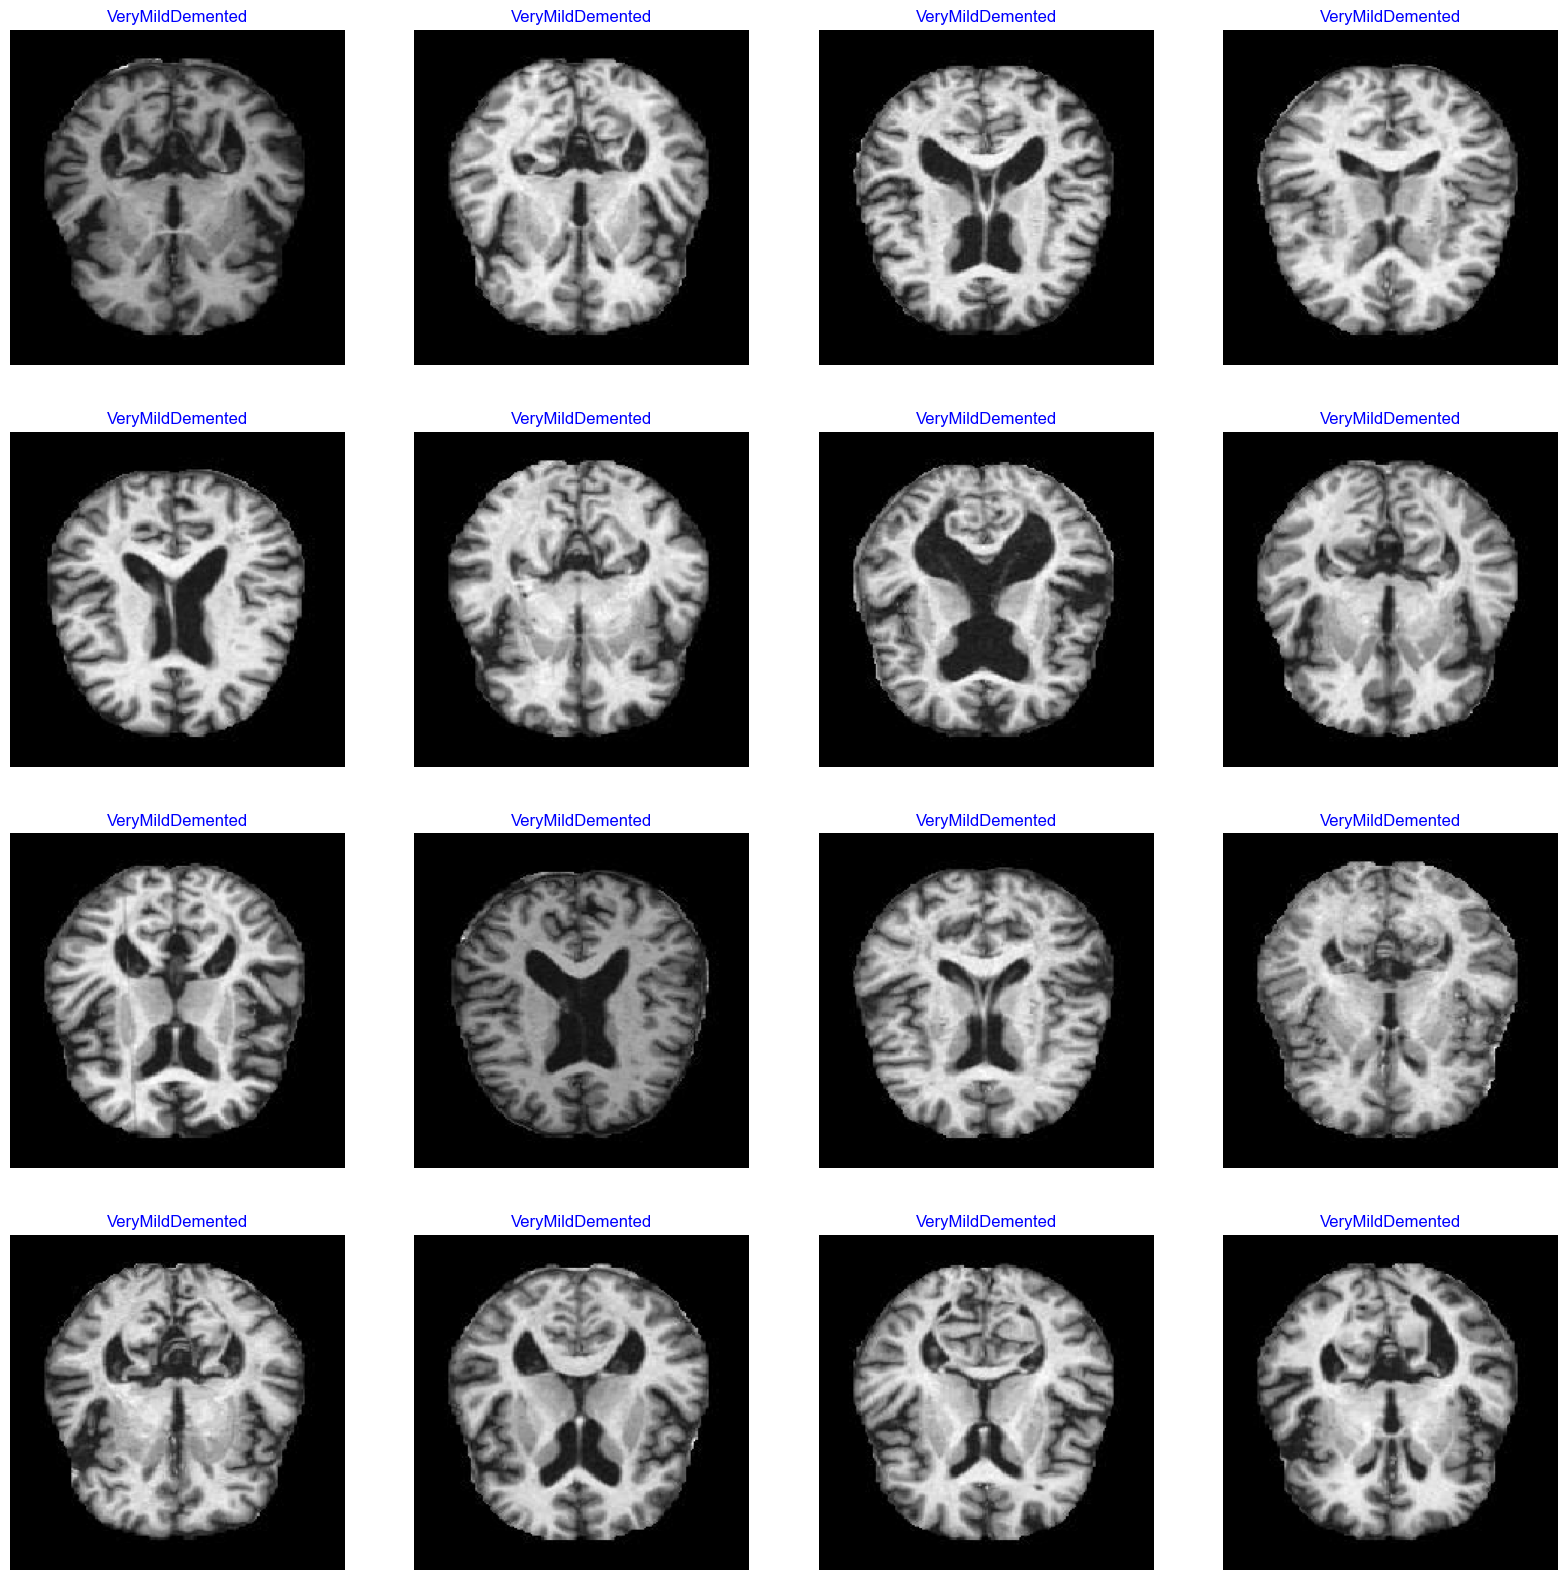

In [37]:
g_dict = data_generator.class_indices      # defines dictionary {'class': index}
classes = list(g_dict.keys())       # defines list of dictionary's kays (classes), classes names : string
images, labels = next(data_generator)      # get a batch size samples from the generator


plt.figure(figsize= (20, 20))

for i in range(16):
    plt.subplot(4, 4, i + 1)
    image = images[i]
    plt.imshow(image)
    index = np.argmax(labels[i])  # get image index
    class_name = classes[index]   # get class of image
    plt.title(class_name, color= 'blue', fontsize= 12)
    plt.axis('off')
plt.show()

In [38]:
data_imgs=np.concatenate([next(data_generator)[0] for i in range(data_generator.__len__())])
data_labels=np.concatenate([next(data_generator)[1] for i in range(data_generator.__len__())])

In [39]:
data_imgs = data_imgs.reshape(-1, 224*224* 3)
#data_imgs,data_labels = SMOTE(random_state=7).fit_resample(data_imgs,data_labels)
data_imgs = data_imgs.reshape(-1,224,224,3)

In [40]:
data_generator.class_indices

{'MildDemented': 0,
 'ModerateDemented': 1,
 'NonDemented': 2,
 'VeryMildDemented': 3}

In [41]:
map  ={0:'MildDemented',
 1:'ModerateDemented',
 2:'NonDemented',
 3:'VeryMildDemented'}

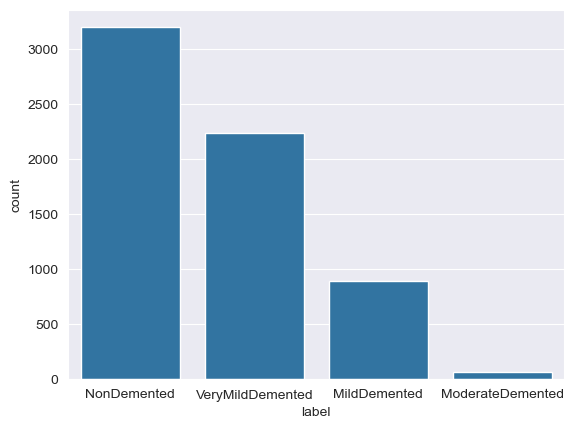

In [42]:
labels=pd.Series([map[i] for i in np.argmax(data_labels,axis=1)],name="label")
labels_count = labels.value_counts().reset_index()
sns.barplot(data=labels_count,x="label",y="count")
plt.show()

In [44]:
labels_count

,label,count
0,NonDemented,3200
1,VeryMildDemented,2240
2,MildDemented,896
3,ModerateDemented,64


In [45]:
train_imgs, test_imgs, train_labels,test_labels = train_test_split(data_imgs,data_labels,  train_size= 0.75, shuffle= True, random_state= 7,stratify=data_labels)

In [46]:
test_imgs, val_imgs, test_labels,val_labels = train_test_split(test_imgs,test_labels,  train_size= 0.5, shuffle= True, random_state= 7,stratify= test_labels)

In [47]:
train_imgs.shape

(4800, 224, 224, 3)

In [48]:
val_imgs.shape

(800, 224, 224, 3)

In [49]:
test_imgs.shape

(800, 224, 224, 3)

In [50]:
base_model =tf.keras.applications.VGG16(include_top=False, weights="imagenet", input_shape=(224,224,3),pooling='max')

In [51]:
x = base_model.output
x = Dense(256,activation="relu")(x)
x = Dense(256,activation="relu")(x)
x = Dropout(0.2)(x)
predictions = Dense(4, activation='softmax')(x)

model = keras.models.Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable= False


model.compile(loss="categorical_crossentropy", optimizer=Adamax(learning_rate=0.001), metrics=["accuracy","AUC"])

In [52]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling2d            │ (None, 512)            │             0 │
│ (GlobalMaxPooling2D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴─────────────

 Total params: 14,912,836 (56.89 MB)

 Trainable params: 198,148 (774.02 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [53]:
history = model.fit(
    train_imgs,train_labels,
    epochs = 75,
    validation_data = [val_imgs,val_labels],
    batch_size=batch_s
)

Epoch 1/75
150/150 ━━━━━━━━━━━━━━━━━━━━ 1488s 10s/step - AUC: 0.7736 - accuracy: 0.4991 - loss: 1.1180 - val_AUC: 0.8348 - val_accuracy: 0.5325 - val_loss: 0.9262
Epoch 2/75
150/150 ━━━━━━━━━━━━━━━━━━━━ 1459s 10s/step - AUC: 0.8405 - accuracy: 0.5656 - loss: 0.9188 - val_AUC: 0.8499 - val_accuracy: 0.5938 - val_loss: 0.9010
Epoch 3/75
150/150 ━━━━━━━━━━━━━━━━━━━━ 731s 5s/step - AUC: 0.8624 - accuracy: 0.5946 - loss: 0.8576 - val_AUC: 0.8588 - val_accuracy: 0.6025 - val_loss: 0.8719
Epoch 4/75
150/150 ━━━━━━━━━━━━━━━━━━━━ 687s 5s/step - AUC: 0.8758 - accuracy: 0.6162 - loss: 0.8183 - val_AUC: 0.8654 - val_accuracy: 0.6125 - val_loss: 0.8573
Epoch 5/75
150/150 ━━━━━━━━━━━━━━━━━━━━ 653s 4s/step - AUC: 0.8761 - accuracy: 0.6228 - loss: 0.8235 - val_AUC: 0.8674 - val_accuracy: 0.6112 - val_loss: 0.8464
Epoch 6/75
150/150 ━━━━━━━━━━━━━━━━━━━━ 643s 4s/step - AUC: 0.8892 - accuracy: 0.6451 - loss: 0.7802 - val_AUC: 0.8728 - val_accuracy: 0.6087 - val_loss: 0.8248
Epoch 7/75
150/150 ━━━━━━━━━━━

In [54]:
model.evaluate(test_imgs,test_labels)

25/25 ━━━━━━━━━━━━━━━━━━━━ 88s 4s/step - AUC: 0.9708 - accuracy: 0.8553 - loss: 0.4465


[0.40714171528816223, 0.8687499761581421, 0.9750433564186096]

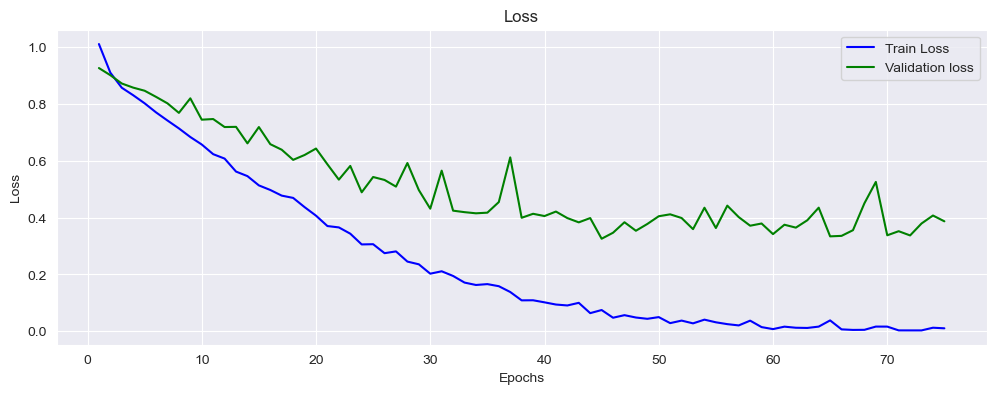

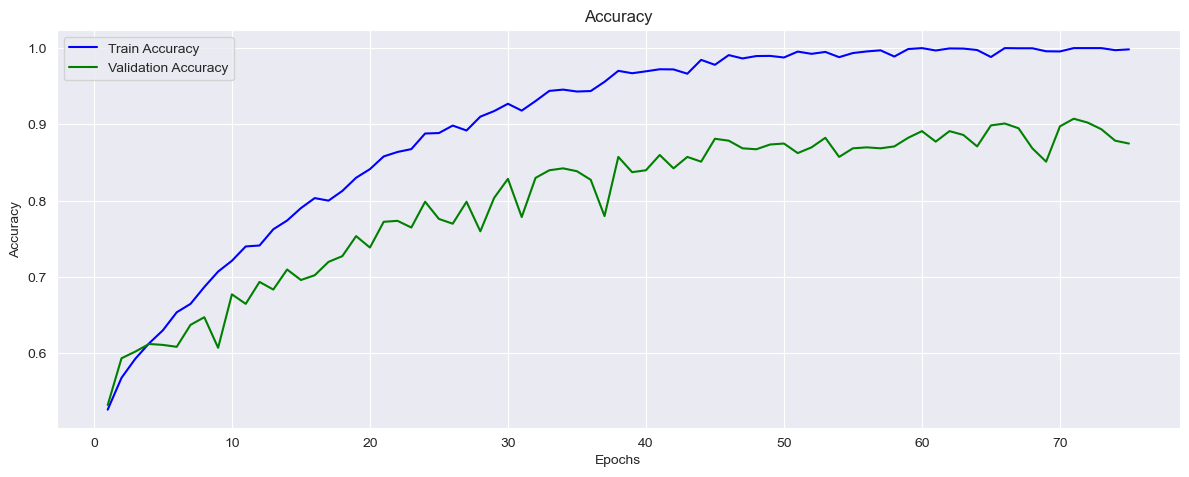

In [55]:
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

epochs = [i+1 for i in range(len(train_acc))]

plt.figure(figsize=(12,9))
plt.subplot(2,1,1)
plt.plot(epochs,train_loss,'b',label="Train Loss")
plt.plot(epochs,val_loss,'g',label="Validation loss")
plt.title("Loss")
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.figure(figsize=(12,9))
plt.subplot(2,1,1)
plt.plot(epochs,train_acc,'b',label="Train Accuracy")
plt.plot(epochs,val_acc,'g',label="Validation Accuracy")
plt.title("Accuracy")
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()

In [56]:
predictions = model.predict(test_imgs) 
y_pred = np.argmax(predictions, axis = 1)
y_true = np.argmax(test_labels, axis = 1)

25/25 ━━━━━━━━━━━━━━━━━━━━ 90s 4s/step


In [57]:
print(classification_report(y_true,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.74      0.79       112
           1       0.80      1.00      0.89         8
           2       0.94      0.87      0.90       400
           3       0.80      0.91      0.85       280

    accuracy                           0.87       800
   macro avg       0.85      0.88      0.86       800
weighted avg       0.87      0.87      0.87       800



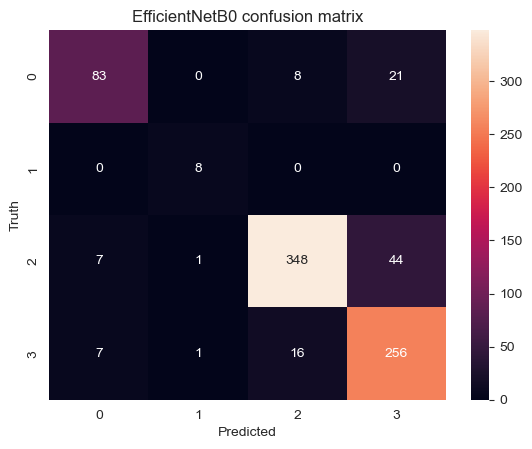

In [58]:
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title("EfficientNetB0 confusion matrix")
plt.show()